# MY MOVIES DATASET
Use the association rules on my_movies dataset to understand the business problem and provide solutions.

## BUSINESS OBJECTIVE
* Maximize profit
* Maximize Visibility
* Minimize empty seats

## CONSTRAINTS
* Access to OTT platforms
* Content driven

Importing the required libraries

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori , association_rules
from termcolor import colored

Loading the dataset

In [2]:
df0=pd.read_csv(r"D:\360Digitmg\ASSIGNMENTS\Ass9\my_movies.csv")
df=df0.copy()
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [3]:
df.drop(['V1','V2','V3','V4','V5'],axis=1,inplace=True)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


## EXPLORATORY DATA ANALYSIS
The below lines gives a very basic understanding of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [5]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
cb=pd.DataFrame(df['Sixth Sense'].value_counts())
yb=pd.DataFrame(df['Gladiator'].value_counts())
Cb=pd.DataFrame(df['LOTR1'].value_counts())
db=pd.DataFrame(df['Harry Potter1'].value_counts())
rb=pd.DataFrame(df['Patriot'].value_counts())
ab=pd.DataFrame(df['LOTR2'].value_counts())
gb=pd.DataFrame(df['Harry Potter2'].value_counts())
ic=pd.DataFrame(df['LOTR'].value_counts())
ia=pd.DataFrame(df['Braveheart'].value_counts())
Ia=pd.DataFrame(df['Green Mile'].value_counts())

print(colored('The number of distributors for each movie are as follows : \n','blue',attrs=['bold']))
print(colored('The Sixth Sense  : ','blue',attrs=['bold']),cb.iat[1,0],'\n')
print(colored('Gladiator : ','blue',attrs=['bold']),yb.iat[1,0],'\n')
print(colored('Lord of the Rings Part 1 : ','blue',attrs=['bold']),Cb.iat[1,0],'\n')
print(colored('Harry Potter1 : ','blue',attrs=['bold']),db.iat[1,0],'\n')
print(colored("Patriot : ",'blue',attrs=['bold']),rb.iat[1,0],'\n')
print(colored('Lord of the Rings Part 2  : ','blue',attrs=['bold']),ab.iat[1,0],'\n')
print(colored('Harry Potter2  : ','blue',attrs=['bold']),gb.iat[1,0],'\n')
print(colored('Lord of the Rings : ','blue',attrs=['bold']),ic.iat[1,0],'\n')
print(colored('Braveheart : ','blue',attrs=['bold']),ia.iat[1,0],'\n')
print(colored('Green Mile : ','blue',attrs=['bold']),Ia.iat[1,0],'\n')


The number of distributors for each movie are as follows : 

The Sixth Sense  :  4 

Gladiator :  3 

Lord of the Rings Part 1 :  2 

Harry Potter1 :  2 

Patriot :  4 

Lord of the Rings Part 2  :  2 

Harry Potter2  :  1 

Lord of the Rings :  1 

Braveheart :  1 

Green Mile :  2 



__Most Frequent Itemsets based on Support__

Using the mlxtend library to use the apriori algorithm, the minimum support is set to 0.2 which means the minimum number of films distributed by each distributor should be 2.

In [8]:
frequent_itemsets= apriori(df,min_support=0.2,max_len=3,use_colnames=True)
frequent_itemsets.sort_values('support',ascending=False,inplace=True)
frequent_itemsets

C:\Users\lenny\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
1,0.7,(Gladiator)
0,0.6,(Sixth Sense)
4,0.6,(Patriot)
10,0.6,"(Patriot, Gladiator)"
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Patriot, Sixth Sense)"
12,0.4,"(Patriot, Sixth Sense, Gladiator)"
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
5,0.2,(LOTR2)


__Plotting the itemsets with higher support values__

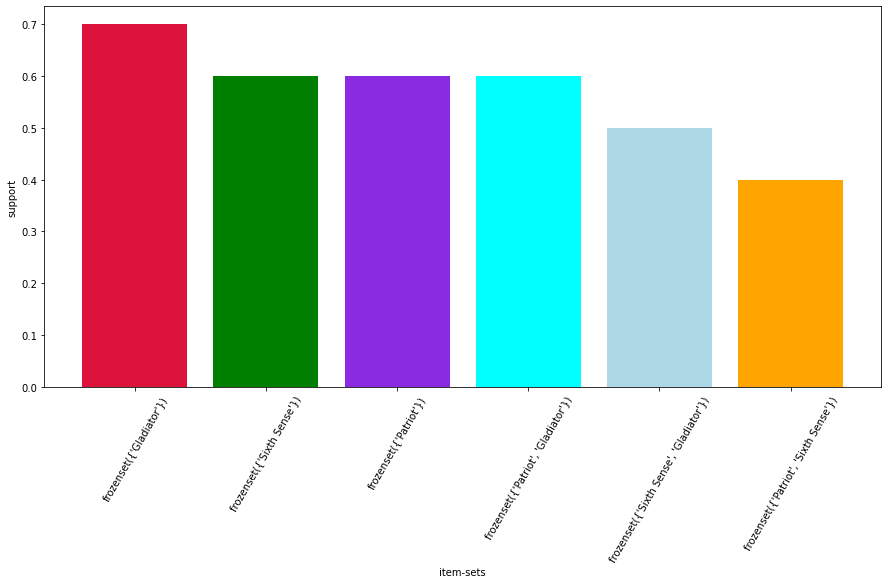

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
plt.bar(x=list(range(0,6)),height=frequent_itemsets.support[0:6],color=['crimson','green','blueviolet','cyan','lightblue','orange','brown','lawngreen'])
plt.xticks(list(range(0, 6)), frequent_itemsets.itemsets[0:6], rotation=60)
plt.xlabel('item-sets')
plt.ylabel('support')
plt.show()

Using the association rules from mlxtend to get the support, confidence and lift values. Setting the min value for lift to 1 as anything below that indicates lower chance of it being bought. 

In [10]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.shape

(16, 9)

In [11]:
rules=rules.sort_values('lift',ascending=False)
rules=rules.reset_index()
rules.head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,14,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
1,15,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
2,12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,13,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
4,1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,0,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,11,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4
8,8,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0
9,9,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5


#### Profusion Removal
from the above table its clear that there are many duplicates so following the below steps to remove the duplicates. 

In [12]:
#Using a custom function which returns a list.
def to_list(i):
    return (list(i))
#The antecedents and consequents are separately added to a list and concatenated creating a series. 
ma_X = rules.antecedents.apply(to_list) + rules.consequents.apply(to_list)
#The series is then sorted in alphabetical order.
ma_X = ma_X.apply(sorted)
#The series is then saved to rules_sets as a list. 
rules_sets = list(ma_X)
#To eliminate the duplicates the list is then converted into a tuple and then again converted to a list.
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
#Creating a empty list
index_rules = []
#storing the index number of the remaining itemsets in index_rules.
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

# getting rules without any redudancy/profusion
rules_no_redudancy = rules.iloc[index_rules, :]

# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift', ascending = False).head(10)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,14,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
2,12,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,1,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,6,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
10,2,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
12,4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2


## INSIGHTS
* From the above table it is clear that the distributor who have bought LOTR1 were also buying LOTR2.
* Movies like Patriot, Gladiator & Sixth sense , the chances of these movies being bought by distributors increases if any one of them is bought. 
* The distributors who have bought Green Mile are also buying Sixth sense.

## CONCLUSION
* Films belonging to successful series have a higher chance of being bought by distributors and thereby get more visibility in theaters. 
* Films belonging to drama, action, thriller genre also are being bought by distributors.
* So films belonging to a series or drama, action & thriller genre have higher chance of success as the distributors will buy them giving it more visiblilty.